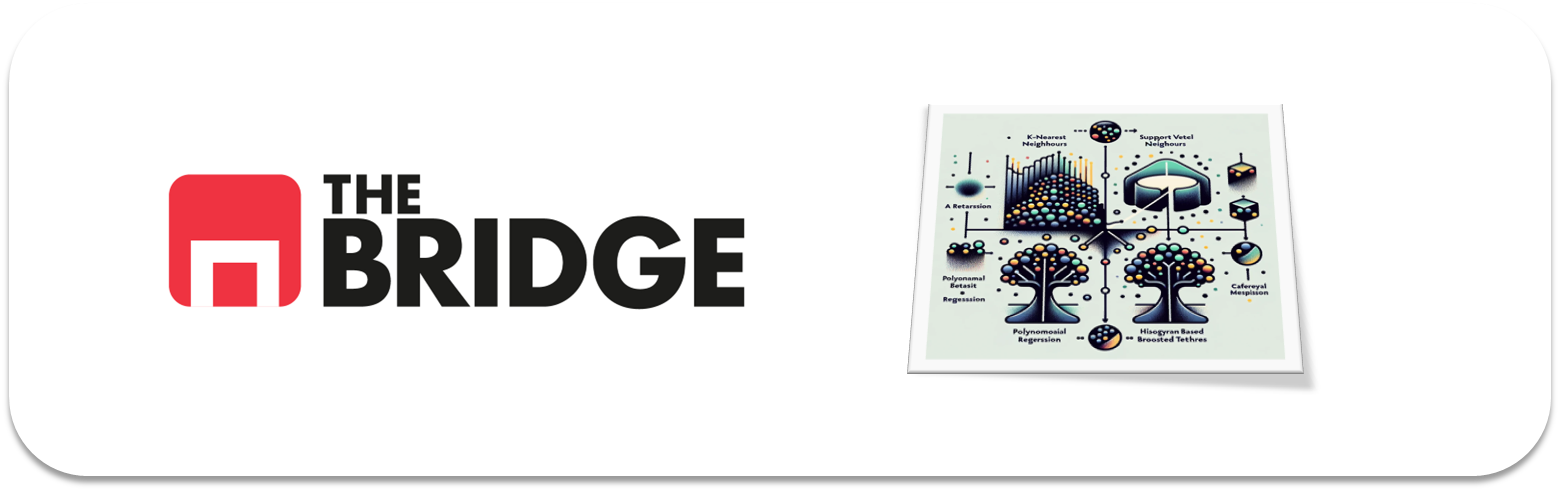

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [148]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, make_scorer, precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [149]:
df = pd.read_csv('./data/wines_dataset.csv', sep='|')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [151]:
def describe_df(df):
    """
     La función realiza un análisis de las columnas de un dataframe.

    Argumento:
    el dataframe (df) que hay que analizar.

    Retorna:
    tipo: un dataframe con la información detallada siguiente sobre cada columna del dataframe :
       - el tipo de la columna,
       - el tanto por ciento de valores nulos o missings,
       - los valores únicos y
       - el porcentaje de cardinalidad.
       
    """
    # Inicializar listas para la información correspondiente
    column_names = []
    data_types = []
    null_percentages = []
    unique_values = []
    cardinality_percentages = []

    # Iterar sobre cada columna del dataframe
    for column in df.columns:
        
        # Nombre de la columna
        column_names.append(column)

        # Tipo de dato de la columna
        data_types.append(df[column].dtype)

        # Porcentaje de valores nulos
        null_percentage = (df[column].isnull().sum() / len(df)) * 100
        null_percentages.append(null_percentage)

        # Valores únicos
        unique_value = df[column].nunique()
        unique_values.append(unique_value)

        # Porcentaje de cardinalidad
        cardinality_percentage = (unique_value / len(df)) * 100
        cardinality_percentages.append(cardinality_percentage)
        
        
    # Crear un nuevo dataframe 
    result_df = pd.DataFrame({
        'COL_N': column_names,
        'DATA_TYPE': data_types,
        'MISSINGS(%)': null_percentages,
        'UNIQUE_VALUES': unique_values,
        'CARDIN(%)': cardinality_percentages
    })

    return result_df

describe_df(df)

,COL_N,DATA_TYPE,MISSINGS(%),UNIQUE_VALUES,CARDIN(%)
0,fixed acidity,float64,0.0,106,1.631522
1,volatile acidity,float64,0.0,187,2.878252
2,citric acid,float64,0.0,89,1.369863
3,residual sugar,float64,0.0,316,4.863783
4,chlorides,float64,0.0,214,3.293828
5,free sulfur dioxide,float64,0.0,135,2.077882
6,total sulfur dioxide,float64,0.0,276,4.248115
7,density,float64,0.0,998,15.360936
8,pH,float64,0.0,108,1.662306
9,sulphates,float64,0.0,111,1.708481


In [152]:
def tipifica_variables(df, umbral_categoria, umbral_continua):
    """
    La función sugiere el tipo de cada variable presente en un dataframe.

    Argumentos:
    df: El dataframe a analizar.
    umbral_categoria (int): Umbral para considerar una variable como categórica.
    umbral_continua (float): Umbral para considerar una variable numérica como continua.

    Retorna:
    tipo : un dataframe con dos columnas, "nombre_variable" y "tipo_sugerido".
    """
    
    # Inicializar listas para la información correspondiente
    variable_names = []
    sugg_types = []

# Iterar sobre cada columna del dataframe
    for column in df.columns:
        
    # Nombre de la columna
        variable_names.append(column)

        # Cardinalidad de la columna
        cardinality = df[column].nunique()

        # Tipo sugerido según las pautas siguientes:  
        """
    - Si la cardinalidad es 2, asignara "Binaria"
    - Si la cardinalidad es menor que umbral_categoria asignara "Categórica"
    - Si la cardinalidad es mayor o igual que umbral_categoria, entonces entra en juego el tercer argumento:
        - Si además el porcentaje de cardinalidad es superior o igual a umbral_continua, asigna "Numerica Continua"
        - En caso contrario, asigna "Numerica Discreta"
        """
        if cardinality == 2:
                suggested_type = "Binaria"
        elif cardinality < umbral_categoria:
            suggested_type = "Categórica"
        else:
            cardinality_percentage = (cardinality / len(df)) * 100
            if cardinality_percentage >= umbral_continua:
                suggested_type = "Numerica Continua"
            else:
                suggested_type = "Numerica Discreta"

    # Añadir el tipo sugerido a la lista
        sugg_types.append(suggested_type)

    # Crear un nuevo dataframe con la información recopilada
    result_df = pd.DataFrame({
    'nombre_variable': variable_names,
    'tipo_sugerido': sugg_types
})
    return result_df

In [153]:
tipifica_variables(df,8,1)

,nombre_variable,tipo_sugerido
0,fixed acidity,Numerica Continua
1,volatile acidity,Numerica Continua
2,citric acid,Numerica Continua
3,residual sugar,Numerica Continua
4,chlorides,Numerica Continua
5,free sulfur dioxide,Numerica Continua
6,total sulfur dioxide,Numerica Continua
7,density,Numerica Continua
8,pH,Numerica Continua
9,sulphates,Numerica Continua


In [154]:
target_1 = 'quality'
target_2 = 'alcohol'

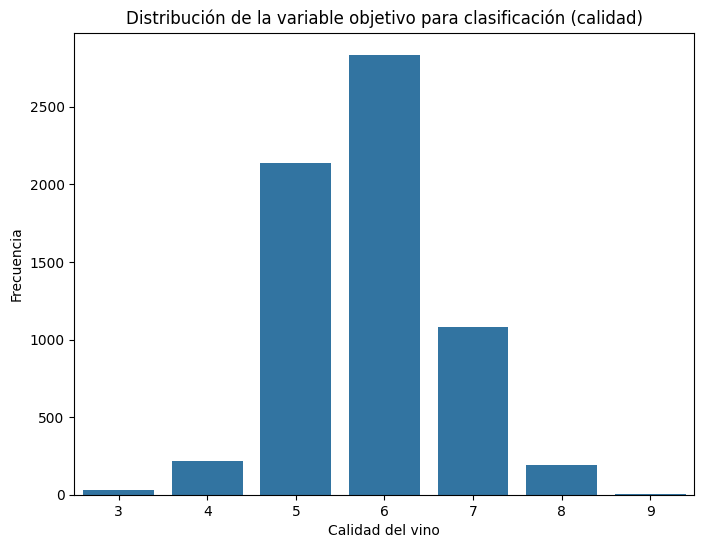

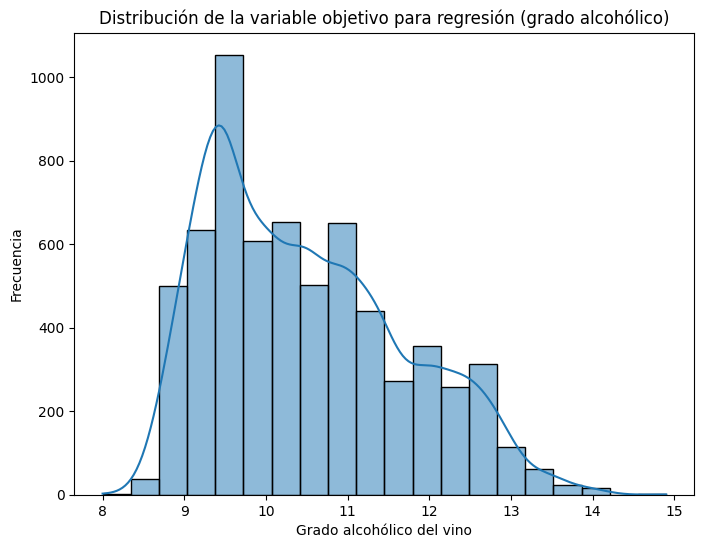

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variable objetivo para clasificación (calidad)
target_clasificacion = df['quality']

# Variable objetivo para regresión (grado alcohólico)
target_regresion = df['alcohol']

# Distribución de la variable objetivo para clasificación
plt.figure(figsize=(8, 6))
sns.countplot(x=target_clasificacion)
plt.title('Distribución de la variable objetivo para clasificación (calidad)')
plt.xlabel('Calidad del vino')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de la variable objetivo para regresión
plt.figure(figsize=(8, 6))
sns.histplot(x=target_regresion, bins=20, kde=True)
plt.title('Distribución de la variable objetivo para regresión (grado alcohólico)')
plt.xlabel('Grado alcohólico del vino')
plt.ylabel('Frecuencia')
plt.show()


### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [156]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

# Separar características y etiquetas
X = df.drop(columns=['quality', 'class'])
y = df['quality']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelos a probar
models = {
    "K Vecinos más Cercanos": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Parámetros a probar para KNN
param_grid_knn = {'n_neighbors': [5, 10, 15]}

# Evaluación de modelos
for name, model in models.items():
    if name == "K Vecinos más Cercanos":
        # GridSearchCV para KNN
        grid_search = GridSearchCV(model, param_grid_knn, cv=5, scoring='recall_macro')
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
    else:
        # Validación cruzada para otros modelos
        scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='recall_macro')
        print(f"{name}:")
        print(f"Recall medio en validación cruzada: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
        print("------------------------------------------------------------")

# Evaluación del mejor modelo
y_pred = best_model.predict(X_test_scaled)
print("Mejor modelo (KNN) - Resultados en conjunto de prueba:")
print(classification_report(y_test, y_pred))


Random Forest:
Recall medio en validación cruzada: 0.3356 (+/- 0.0252)
------------------------------------------------------------
Gradient Boosting:
Recall medio en validación cruzada: 0.2725 (+/- 0.0272)
------------------------------------------------------------
Mejor modelo (KNN) - Resultados en conjunto de prueba:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.22      0.14      0.17        43
           5       0.60      0.64      0.62       432
           6       0.59      0.63      0.61       562
           7       0.46      0.42      0.44       210
           8       0.23      0.06      0.10        47

    accuracy                           0.56      1300
   macro avg       0.35      0.32      0.32      1300
weighted avg       0.54      0.56      0.55      1300



In [157]:
features_num_1

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates']

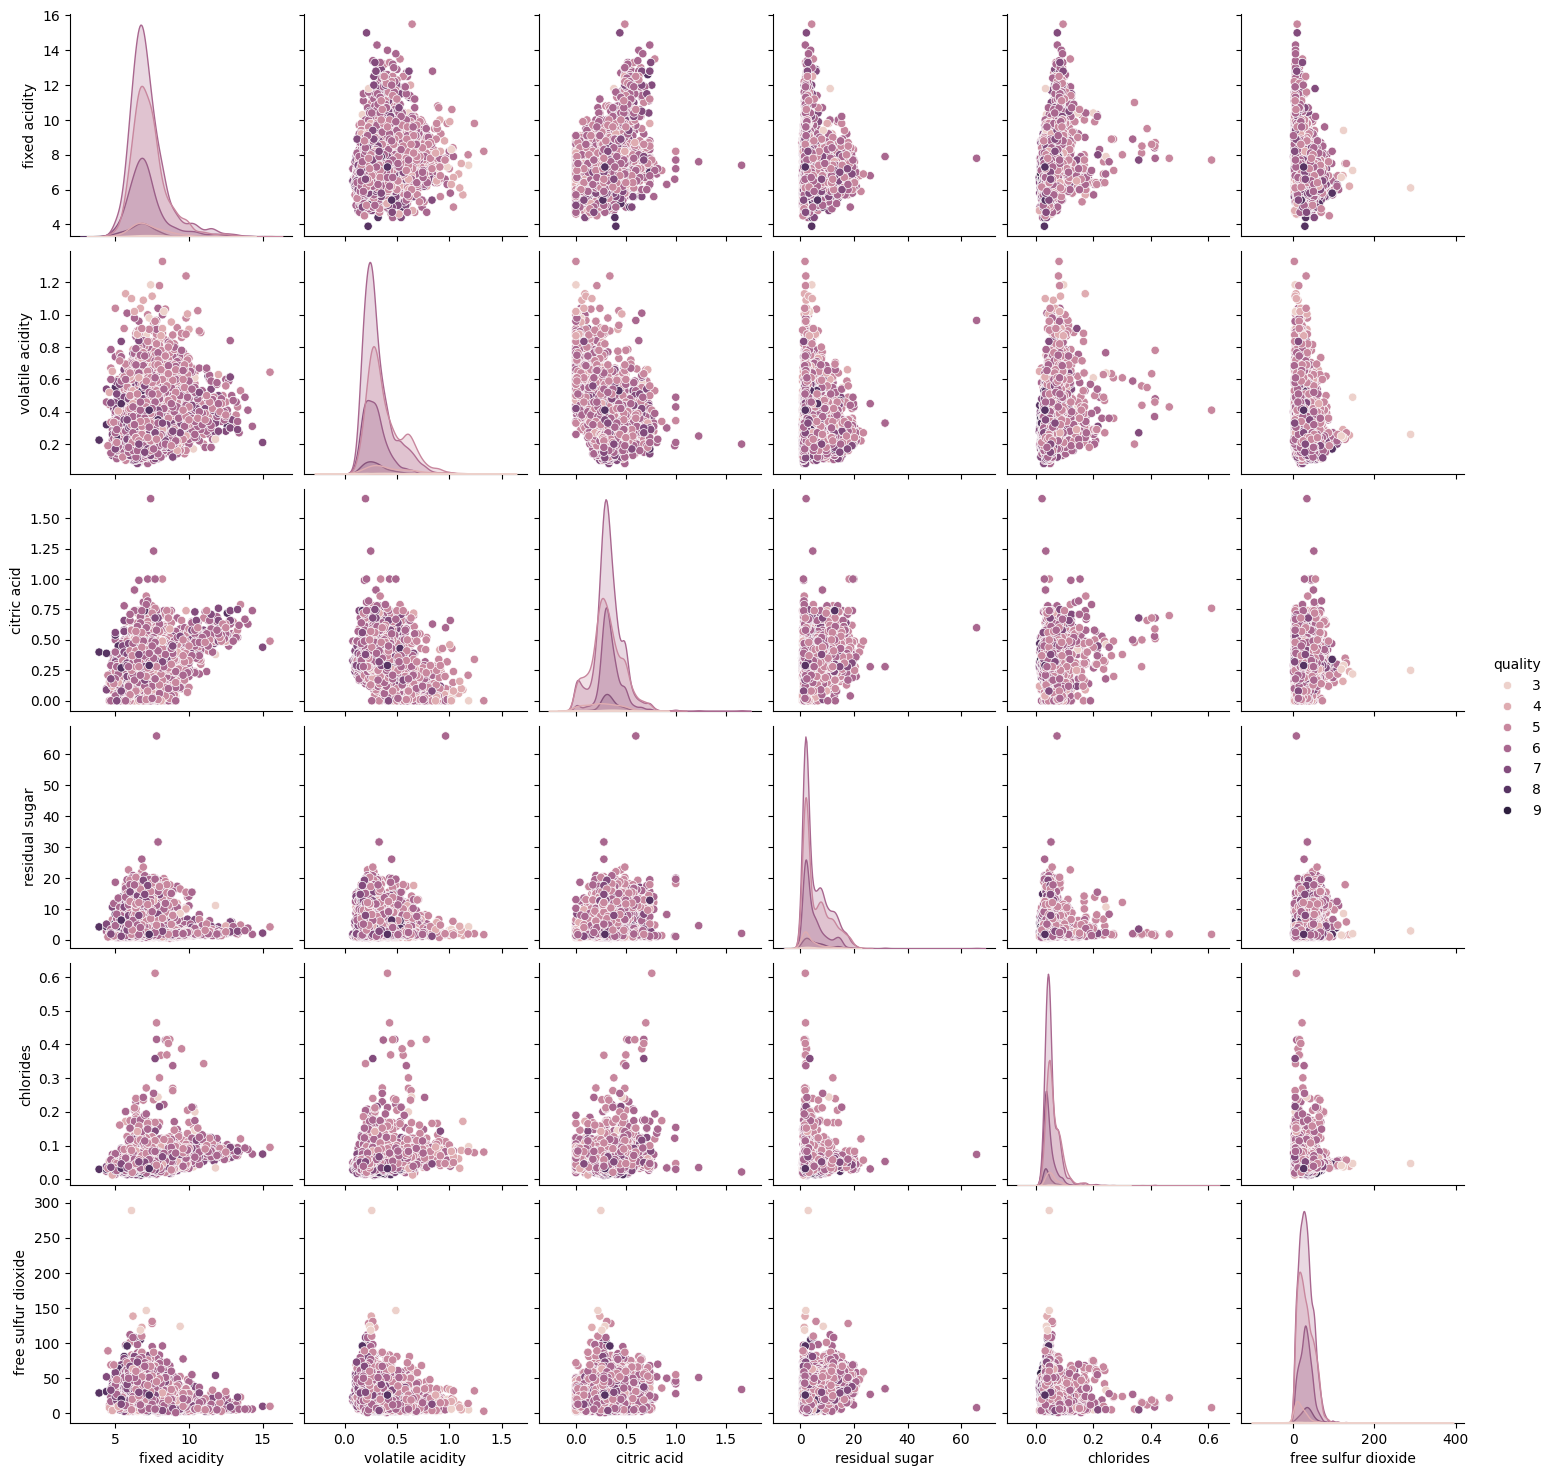

In [158]:
sns.pairplot(train_set[features_num[0:6] + [target_1]], hue = target_1)

In [159]:
sns.pairplot(train_set[features_num[6:12] + [target_1]], hue = target_1)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Me quedo con todas las features, excepto `quality` en la que hay una superposición casi exacta.

``Alcohol`` la reservo como feature de segunda categoría.

In [ ]:
features_num_1 = [feature for feature in features_num_1 if feature not in ['quality', 'alcohol']]
features_num_1_b = ['alcohol']

In [ ]:
features_num_1

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates']

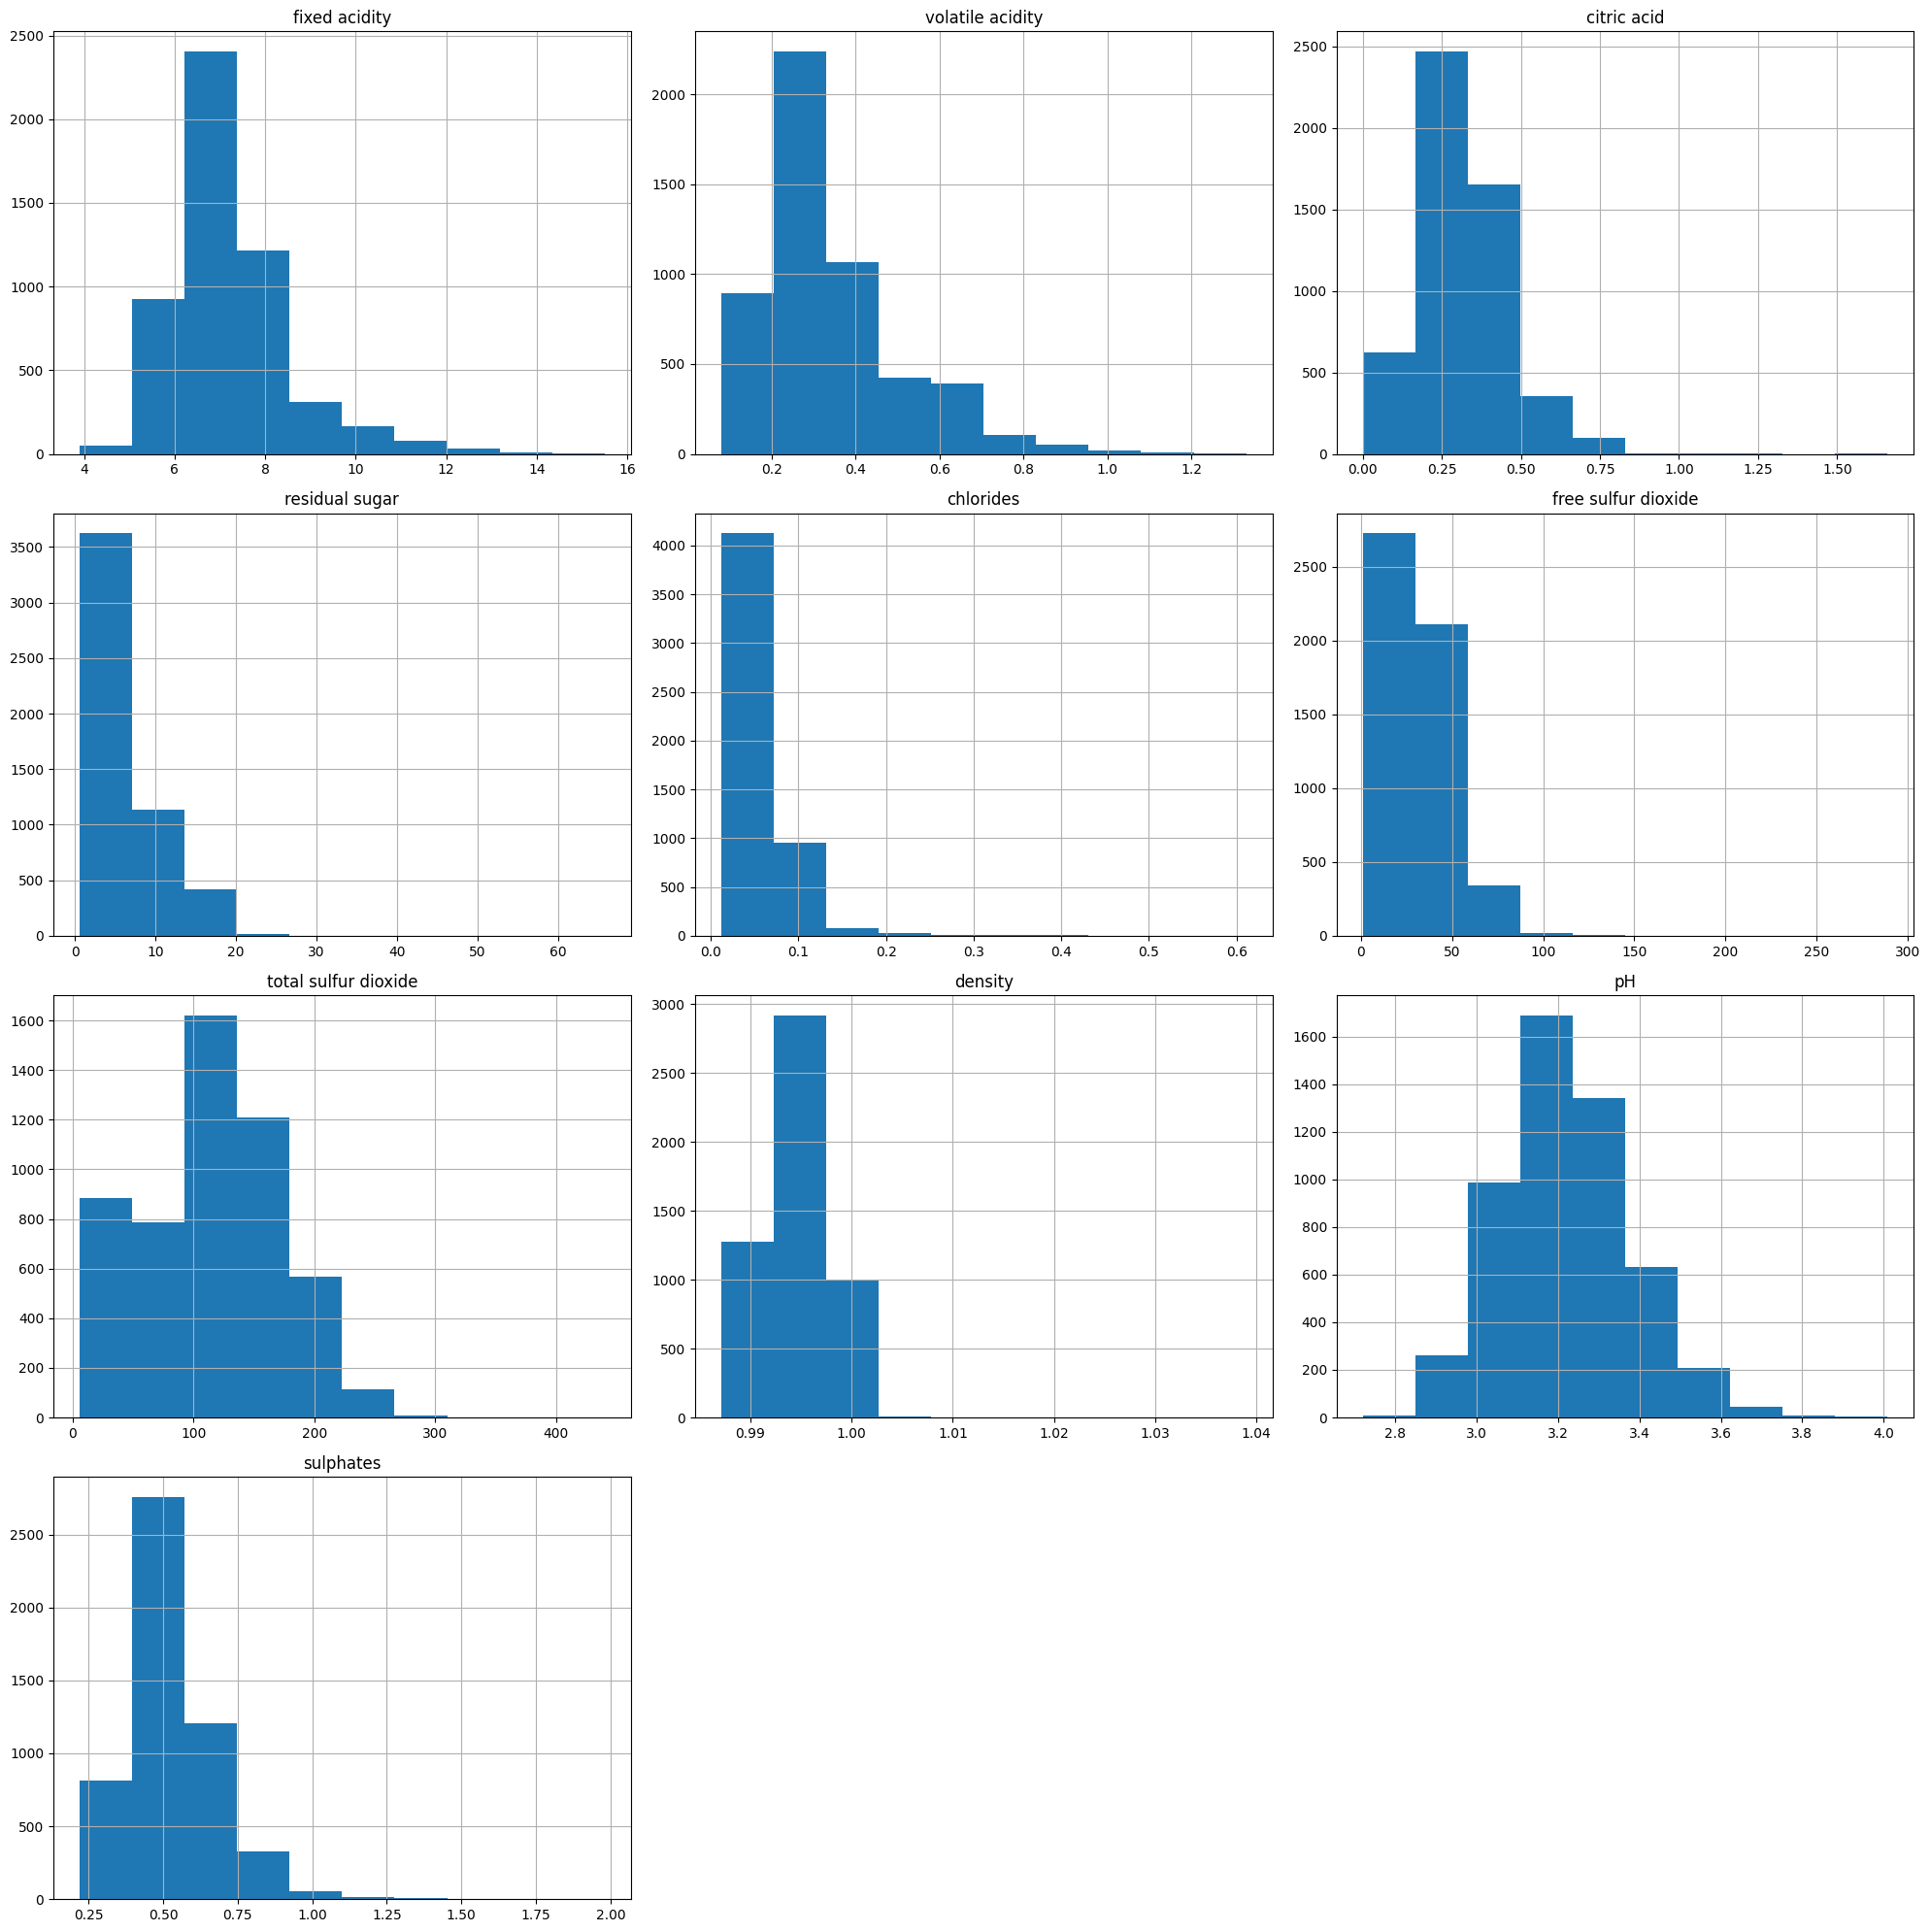

In [ ]:
train_set[features_num_1].hist(figsize = (20,20))
plt.tight_layout()

In [ ]:
features_num_1

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates']

In [ ]:
features_1_to_transform = ['fixed acidity',
 'volatile acidity',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide']

In [ ]:
train_set_scaled_1 = train_set.copy()
test_set_scaled_1 = test_set.copy()

In [ ]:
for col in features_1_to_transform:
    desplaza = 0 
    if train_set_scaled_1[col].min() <= 0:
        desplaza = int(abs(train_set_scaled_1[col].min())) + 1
    train_set_scaled_1[col] = np.log(train_set_scaled_1[col] + desplaza)
    test_set_scaled_1[col] = np.log(test_set_scaled_1[col] + desplaza)

In [ ]:
features_num_1

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates']

In [ ]:
scaler = StandardScaler()
train_set_scaled_1[features_num_1] = scaler.fit_transform(train_set_scaled_1[features_num_1])
test_set_scaled_1[features_num_1] = scaler.transform(test_set_scaled_1[features_num_1])

In [ ]:
y_train_1 = (train_set_scaled_1[target_1] == "red").astype(int) # Clase 0 -> white, Clase 1 -> red
y_test_1 = (test_set_scaled_1[target_1] == "red").astype(int) 

X_train_1_dict = {}
X_test_1_dict = {}

features_set_name = ["sin_num_b","todos"]

for set_name,feature_list in zip(features_set_name, [features_num_1,features_num_1_b]):
    X_train_1_dict[set_name] = train_set[feature_list]
    X_test_1_dict[set_name] = test_set[feature_list]

X_train_1_dict_scaled = {}
X_test_1_dict_scaled = {}

for set_name,feature_list in zip(features_set_name, [features_num_1,features_num_1_b]):
    X_train_1_dict_scaled[set_name] = train_set_scaled_1[feature_list]
    X_test_1_dict_scaled[set_name] = test_set_scaled_1[feature_list]

In [ ]:
lr_clf = LogisticRegression(max_iter = 1000)
rf_clf = RandomForestClassifier(max_depth= 6, random_state= 42)
lgb_clf = LGBMClassifier(max_depth= 6, random_state = 42, verbose = -100)
xgb_clf = XGBClassifier(max_depth = 6, random_state = 42)

modelos = {
    "Regresion Logistica": lr_clf,
    "Random Forest": rf_clf,
    "Lightgbm": lgb_clf,
    "XGBoost": xgb_clf
}

In [ ]:
# Para scoring precision
scoring_func = make_scorer(precision_score, pos_label = 1)
for feature_set, X_train in X_train_1_dict.items():
    X_train_scaled = X_train_1_dict_scaled[feature_set]
    print(f"Para el set {feature_set}:")
    for tipo,modelo in modelos.items():
        print(f"{tipo}: ", end = " ")
        if tipo != "Regresion Logistica":
            print(np.mean(cross_val_score(modelo, X_train, y_train_1, cv = 5, scoring = scoring_func)))
        else:
            print(np.mean(cross_val_score(modelo, X_train_scaled, y_train_1, cv = 5, scoring = scoring_func)))
    print("******")

Para el set sin_num_b:
Regresion Logistica:  0.9875599705651494
Random Forest:  0.9952937568850405
Lightgbm:  0.9968840492277993
XGBoost:  0.996102421586442
******
Para el set todos:
Regresion Logistica:  0.0
Random Forest:  

c:\Users\Ángela López\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ángela López\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ángela López\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\User

0.3
Lightgbm:  

c:\Users\Ángela López\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ángela López\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ángela López\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\User

0.0
XGBoost:  

c:\Users\Ángela López\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ángela López\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.1
******


In [ ]:
# Para scoring balanced_accuracy

for feature_set, X_train in X_train_1_dict.items():
    X_train_scaled = X_train_1_dict_scaled[feature_set]
    print(f"Para el set {feature_set}:")
    for tipo,modelo in modelos.items():
        print(f"{tipo}: ", end = " ")
        if tipo != "Regresion Logistica":
            print(np.mean(cross_val_score(modelo, X_train, y_train_1, cv = 5, scoring = "balanced_accuracy")))
        else:
            print(np.mean(cross_val_score(modelo, X_train_scaled, y_train_1, cv = 5, scoring = "balanced_accuracy")))
    print("******")

Para el set sin_num_b:
Regresion Logistica:  0.9894250313235705
Random Forest:  0.9887669653527814
Lightgbm:  0.9932864494552172
XGBoost:  0.9919957815196913
******
Para el set todos:
Regresion Logistica:  0.5
Random Forest:  0.500007111695041
Lightgbm:  0.5
XGBoost:  0.4998755967420389
******


In [ ]:
# Para la precision de "red" (clase 1)
param_grid = {
    "C": [0.1, 1,10,100], # 
    "class_weight": ["balanced",None],
    "max_iter": [1000,5000,10000]
}

lr_grid = GridSearchCV(lr_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring = scoring_func)

lr_grid.fit(X_train_1_dict_scaled[features_set_name[-1]], y_train_1)

c:\Users\Ángela López\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ángela López\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ángela López\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\User

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'max_iter': [1000, 5000, 10000]},
             scoring=make_scorer(precision_score, pos_label=1))

In [ ]:
print(lr_grid.best_params_)

{'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000}


In [ ]:
print(lr_grid.best_score_)

0.26167885153311155


In [ ]:
# Para "balanced_accuracy"
param_grid = {
    "C": [0.1, 1,10,100], # 
    "class_weight": ["balanced",None],
    "max_iter": [1000,5000,10000]
}

lr2_grid = GridSearchCV(lr_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring = "balanced_accuracy")

lr2_grid.fit(X_train_1_dict_scaled[features_set_name[-1]], y_train_1)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'max_iter': [1000, 5000, 10000]},
             scoring='balanced_accuracy')

In [ ]:
print(lr2_grid.best_params_)

{'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000}


In [ ]:
print(lr2_grid.best_score_)

0.5197187249089994


In [ ]:
y_pred = lr_grid.best_estimator_.predict(X_test_1_dict_scaled[features_set_name[-1]])
print(classification_report(y_test_1, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.49      0.61       991
           1       0.27      0.59      0.36       309

    accuracy                           0.52      1300
   macro avg       0.53      0.54      0.49      1300
weighted avg       0.67      0.52      0.55      1300



In [ ]:
y_pred_2 = lr2_grid.best_estimator_.predict(X_test_1_dict_scaled[features_set_name[-1]])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.49      0.61       991
           1       0.27      0.59      0.36       309

    accuracy                           0.52      1300
   macro avg       0.53      0.54      0.49      1300
weighted avg       0.67      0.52      0.55      1300



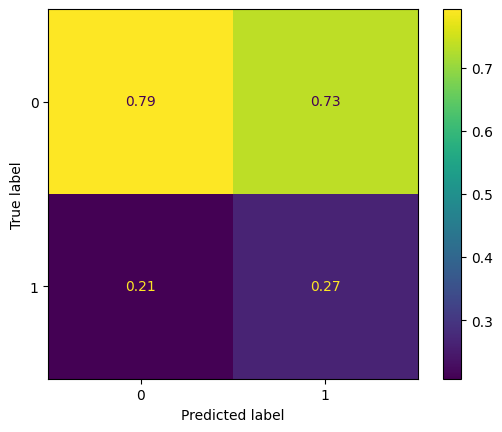

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_1, y_pred, normalize= "pred")

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [160]:
# Separar características y etiquetas
X = df.drop(columns=['alcohol'])
y = df['alcohol']

# Modelos a probar
models = {
    "Regresión Lineal": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

# Evaluación de modelos
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores  # convertir los puntajes negativos en MSE
    print(f"{name}:")
    print(f"Error cuadrático medio en validación cruzada: {mse_scores.mean():.4f} (+/- {mse_scores.std() * 2:.4f})")
    print("------------------------------------------------------------")

# Optimización de hiperparámetros para el modelo Gradient Boosting Regressor
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gb_reg = GradientBoostingRegressor(random_state=42)
grid_search_gb = GridSearchCV(gb_reg, param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X, y)
best_gb_model = grid_search_gb.best_estimator_

# Evaluación del mejor modelo
y_pred_gb = best_gb_model.predict(X)
mse_gb = mean_squared_error(y, y_pred_gb)
r2_gb = r2_score(y, y_pred_gb)
print("Mejor modelo (Gradient Boosting Regressor) - Resultados en conjunto de datos completo:")
print(f"Error cuadrático medio: {mse_gb:.4f}")
print(f"Coeficiente de determinación (R^2): {r2_gb:.4f}")

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ángela López\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ángela López\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ángela López\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_base.py", line 678, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ángela López\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ángela López\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\Ángela López\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ángela López\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ángela López\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'white'
